In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

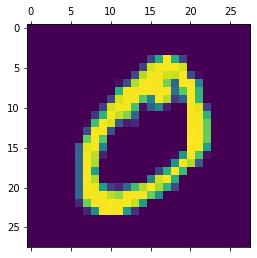

In [7]:
plt.matshow(x_train[1])

In [8]:
y_train[2]

4

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4694 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9261


In [46]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - accuracy: 0.9251


[0.26666176319122314, 0.9251000285148621]

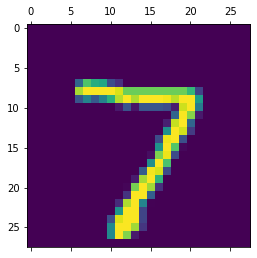

In [47]:
plt.matshow(x_test[0])

In [48]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.9203385e-02, 3.9175421e-07, 6.8798333e-02, 9.6509033e-01,
       3.4264028e-03, 1.0152751e-01, 1.5953883e-06, 9.9977875e-01,
       7.0068538e-02, 6.6783464e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [49]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    1,    0,    4,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,    7,  927,   13,    9,    4,   13,   11,   36,    4],
       [   3,    0,   20,  915,    0,   31,    2,   11,   18,   10],
       [   2,    1,    6,    1,  912,    0,    8,    5,    9,   38],
       [  11,    1,    3,   27,    9,  787,   17,    3,   27,    7],
       [  14,    3,    5,    1,    7,   14,  911,    2,    1,    0],
       [   2,    6,   23,    4,    9,    1,    0,  942,    1,   40],
       [  10,    6,    7,   19,    9,   34,    9,   11,  856,   13],
       [  11,    7,    1,    8,   25,    8,    0,   15,    5,  929]],
      dtype=int32)>

In [50]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.87      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.93      0.92     10000



Text(69.0, 0.5, 'Truth')

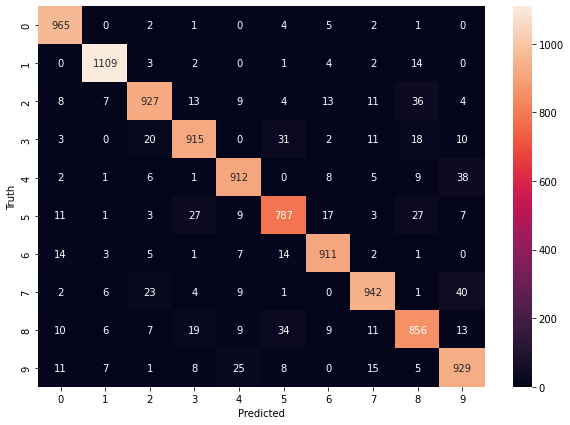

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9834


In [24]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0852 - accuracy: 0.9739


[0.08521313965320587, 0.9739000201225281]

Text(69.0, 0.5, 'Truth')

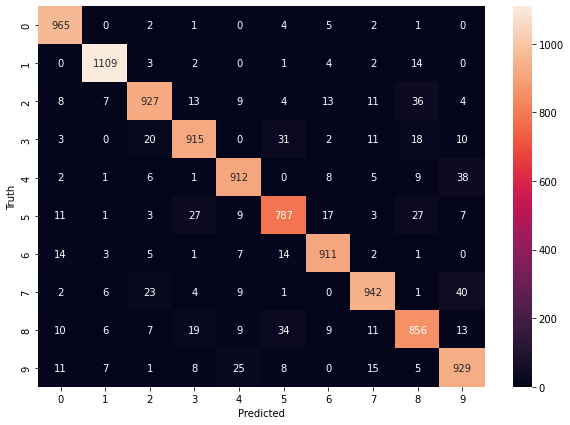

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0278 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0893 - accuracy: 0.9758


[0.08933975547552109, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

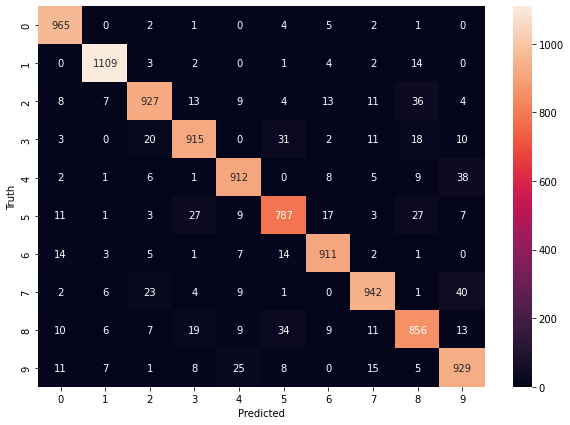

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
from tensorflow.keras import datasets,layers,models
cnn = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=56, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1489 - accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0487 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 44s 24m

In [38]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0391 - accuracy: 0.9895


[0.03909410163760185, 0.9894999861717224]

In [39]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[4.21699724e-11, 8.09004610e-13, 6.16870954e-09, 1.52835238e-08,
        6.22590535e-10, 1.21421292e-14, 3.47475785e-16, 1.00000000e+00,
        2.53108407e-12, 9.18606580e-11],
       [2.69034395e-09, 1.05693978e-08, 1.00000000e+00, 1.13552458e-14,
        2.91711295e-12, 2.69003395e-18, 1.77147706e-11, 3.41914200e-14,
        2.41613340e-10, 1.18770086e-16],
       [1.22058719e-09, 9.99999523e-01, 9.16641096e-10, 1.15077395e-13,
        4.03193269e-07, 3.08544496e-10, 2.58145203e-08, 1.17022196e-08,
        8.63972172e-10, 5.59740448e-11],
       [1.00000000e+00, 1.51474770e-11, 1.05566736e-10, 3.74919551e-14,
        1.01033023e-14, 2.19787188e-10, 1.45779250e-10, 1.66939346e-12,
        3.77763598e-10, 4.81307841e-11],
       [4.59980058e-12, 4.11496965e-12, 1.36285124e-11, 3.94258702e-14,
        9.99999046e-01, 9.67443278e-11, 1.87029266e-13, 1.35411344e-12,
        2.40165682e-11, 9.09614528e-07]], dtype=float32)

In [40]:
y_predicted_labels=[np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

